In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Import all the Required Libraries. 

# **Reading Data**

Above code cell by default attached in notebook for preliminary setup.so the very first step to read data(train and test data both).for this purpose we use pandas library.

In [2]:
# Load the train and test data 

df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

To get a overview about the data by viewing the first 5 rows. Below line of code will result first five row.

In [3]:
# first five data rows 

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


below code will give you the statistics description of data i.e. mean,medain,mode,deviation etc.

In [4]:
# To get a statistical description of Data 

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Get details like column name, datatype , null or not null ,memory usage

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Missing Value Analysis- Training Data

**Count of Missing Values Before Analysis**

In [6]:
# Check which feature/column has how many null values

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# percentage missing values in cabin and age feature 
# count of missing in cabin column divided by total rows count

per_age = (df_train['Age'].isnull().sum())/(df_train.shape[0])*100
per_cabin = (df_train['Cabin'].isnull().sum())/(df_train.shape[0])*100
print("Percentage missing in Age : ",per_age)
print("Percentage Missing in Cabin : ",per_cabin)

Percentage missing in Age :  19.865319865319865
Percentage Missing in Cabin :  77.10437710437711


**Drop Missing Values or if count is more then remove that feature column Itself**

In [8]:
# take a deep copy of data using copy function
# Deep copy are those in which original data is not changed if something changed in copy

df_train = df_train.copy()

# Then drop Cabin Column as it has more than 77% missing values ,axis=1 means drop column not row 

df_train.drop('Cabin',axis=1,inplace=True)

In [9]:
# Get categorywise count, means whatever unique values emabarked feature have, will get count of those

df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# Fill 'S' in place of missing values
# Why 'S'?? - Because As per above output 'S' has too more count than 'C' and 'Q'.
# if these are numerical data either we can put average values in place.
# But here we have categorical, so we can't take average

df_train['Embarked'].fillna('S',inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

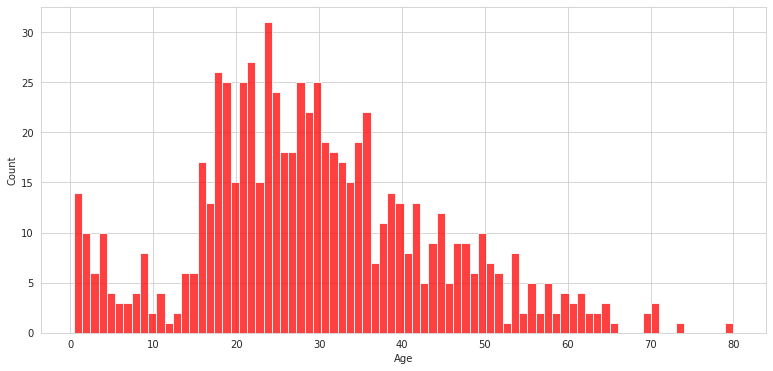

In [11]:
import seaborn as sns  # library using for plots
import matplotlib.pyplot as plt
sns.set_style('whitegrid') # To make a background as a grid with white color
plt.figure(figsize=(13,6))

# plot a historgram with 80 bins so that we can visualize the count for each age(from 1 to 80)
sns.histplot(df_train['Age'],kde=False,bins=80,color='red')

In [12]:
# This is a numerical data so that either we can fill missing values with mean or median of Age col 
# Here we are filling median in place of missing values 

df_train['Age'].fillna(df_train['Age'].median(),inplace=True)

**Count of Missing Values After Analysis**

In [13]:
df_train.isnull().sum()
# Count of missing values in all columns is now zero.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Create New Feature TravelAlone**

* SibSp - It is number of siblings/spouses with passenger
* Parch - It is number of parents/children with passenger

* Just to reduce number of features,we can make single feature which is TravelAlone 
* Add value of SibSp and Parch column 
* If value is is more than 0 ,Put 1 in corresponding cell of TravelAlone
* If value is not more than zero ,Put 0 in Corresponding cell of TravelAlone 


In [14]:
# Create new feature TravelAlone
df_train['TravelAlone'] = np.where((df_train['SibSp']+df_train['Parch']) > 0, 0,1)

# As we have created TravelAlone, drop both columns SibSp and Parch
df_train.drop('SibSp',axis=1,inplace=True)
df_train.drop('Parch',axis=1,inplace=True)

**Dummy Encoding :** It is a concept of changing categroical variable to numeric variable. As an example ,if we have Sex column which has values 'M' for Male and 'F' for female. We can not train or process M and F characters with other numrical data.We need to convert it into numerical values.For this conversion we use Dummy Encoding Technique. 

* It will make Two columns for Sex feature - one is Sex_male other is Sex_female.
* Algorithm will put 1 in sex_male column if value is 'M' in Sex column and 0 if 'F' in Sex column.
* Vice-versa process will follow for Sex-female column as well.

In [15]:
# Encode 'Pclass','Sex','Embarked' features using dummy encoding technique.

train_data = pd.get_dummies(df_train,columns=['Pclass','Sex','Embarked'])

# Drop PassengerID , Name , Ticket as these features are irrelevant for training purpose.
# There is no use for training as these are unique information of a passenger
train_data.drop('PassengerId',axis=1,inplace=True)
train_data.drop('Name',axis=1,inplace=True)
train_data.drop('Ticket',axis=1,inplace=True)

# Sex_female column we got after encoding , as sex has only two categories - Male or female
# we can remove one of them. if 'sex_male'(which is still in training data) has value 0 it 
# means This is a female passenger ,if value the This is a Male passenger.
train_data.drop('Sex_female',axis=1,inplace=True)

final_data = train_data
final_data

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,0,1,1,0,0,1
1,1,38.0,71.2833,0,1,0,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,0,1
3,1,35.0,53.1000,0,1,0,0,0,0,0,1
4,0,35.0,8.0500,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,1,0,0,1
887,1,19.0,30.0000,1,1,0,0,0,0,0,1
888,0,28.0,23.4500,0,0,0,1,0,0,0,1
889,1,26.0,30.0000,1,1,0,0,1,1,0,0


In [16]:
final_data.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,0,1,1,0,0,1
1,1,38.0,71.2833,0,1,0,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,0,1
3,1,35.0,53.1000,0,1,0,0,0,0,0,1
4,0,35.0,8.0500,1,0,0,1,1,0,0,1


In [17]:
train_features = ['Age','Fare','TravelAlone','Pclass_1','Pclass_2','Pclass_3','Sex_male','Embarked_C','Embarked_Q','Embarked_S']
X = final_data[train_features]
Y = final_data['Survived']

# Missing Data Analysis of Test Data 

This Section Just a recap of above step thet we have performed.The only difference is that here we are going to perform analysis on Test Data and previously we preprocess the training data.Just to get a quick revision of preprocessing step on test Data.

In [18]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
df_test.drop('Cabin',axis=1,inplace=True)
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)


In [21]:
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)

In [22]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
df_test['TravelAlone'] = np.where((df_test['SibSp']+df_test['Parch']) > 0, 0,1)
df_test.drop('SibSp',axis=1,inplace=True)
df_test.drop('Parch',axis=1,inplace=True)

In [24]:
test_data = pd.get_dummies(df_test,columns=['Pclass','Sex','Embarked'])
test_data.drop('PassengerId',axis=1,inplace=True)
test_data.drop('Name',axis=1,inplace=True)
test_data.drop('Ticket',axis=1,inplace=True)
test_data.drop('Sex_female',axis=1,inplace=True)


In [25]:
test_data

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,1,0,0,1,1,0,1,0
1,47.0,7.0000,0,0,0,1,0,0,0,1
2,62.0,9.6875,1,0,1,0,1,0,1,0
3,27.0,8.6625,1,0,0,1,1,0,0,1
4,22.0,12.2875,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,27.0,8.0500,1,0,0,1,1,0,0,1
414,39.0,108.9000,1,1,0,0,0,1,0,0
415,38.5,7.2500,1,0,0,1,1,0,0,1
416,27.0,8.0500,1,0,0,1,1,0,0,1


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [28]:
reg_log = LogisticRegression(solver='lbfgs', max_iter=1000)
reg_log.fit(x_train,y_train)
log_pred = reg_log.predict(x_test)
accuracy_score(y_test,log_pred)

0.8100558659217877

In [29]:
reg_svc = LinearSVC()
reg_svc.fit(x_train,y_train)
svm_pred = reg_svc.predict(x_test)
accuracy_score(y_test,svm_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.5586592178770949

In [30]:
reg_rand = RandomForestClassifier(n_estimators=100)
reg_rand.fit(x_train,y_train)
rf_pred = reg_rand.predict(x_test)
accuracy_score(rf_pred,y_test)

0.8603351955307262

In [31]:
reg_KNN = KNeighborsClassifier(n_neighbors=9,weights='distance')
reg_KNN.fit(x_train,y_train)
knn_pred = reg_KNN.predict(x_test)
accuracy_score(y_test,knn_pred)

0.7541899441340782

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(11,11,11), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

mlp_pred = mlp.predict(x_test)
accuracy_score(y_test,mlp_pred)

0.8156424581005587

In [33]:
final_pred = reg_rand.predict(test_data)


In [34]:
output = pd.DataFrame({
    "PassengerId" : df_test['PassengerId'],
    "Survived" : final_pred
})
output.to_csv('submission.csv',index=False)